<a href="https://colab.research.google.com/github/hxyang/illusion/blob/master/play_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install mols2grid

In [2]:
%pip install posebusters

  Using cached posebusters-0.4.1-py3-none-any.whl.metadata (4.5 kB)
  Using cached rdkit-2024.9.6-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (4.0 kB)
Using cached posebusters-0.4.1-py3-none-any.whl (554 kB)
Using cached rdkit-2024.9.6-cp311-cp311-manylinux_2_28_x86_64.whl (34.3 MB)


In [3]:
%pip install useful_rdkit_utils

  Using cached useful_rdkit_utils-0.80-py3-none-any.whl.metadata (2.2 kB)
  Using cached dataclasses-0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached py3Dmol-2.4.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pystow-0.7.0-py3-none-any.whl.metadata (17 kB)
Using cached useful_rdkit_utils-0.80-py3-none-any.whl (1.4 MB)
Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
Using cached py3Dmol-2.4.2-py2.py3-none-any.whl (7.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 41.9 MB/s eta 0:00:00
Using cached pystow-0.7.0-py3-none-any.whl (38 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from posebusters import PoseBusters
from rdkit import Chem
from rdkit.Chem import PandasTools
import useful_rdkit_utils as uru
import mols2grid
from rdkit.Chem.Draw import MolsToGridImage
import pandas as pd
import seaborn as sns
import itertools
from rdkit.Chem import rdMolAlign
from operator import itemgetter
from tqdm.auto import tqdm
from rdkit.Chem import AllChem

In [5]:
tqdm.pandas()

In [6]:
df_0 = PandasTools.LoadSDF("sample_data/all.sdf")

[11:03:19] Explicit valence for atom # 26 C, 4, is greater than permitted
[11:03:19] ERROR: Could not sanitize molecule ending on line 785
[11:03:19] ERROR: Explicit valence for atom # 26 C, 4, is greater than permitted
[11:03:19] Explicit valence for atom # 24 C, 4, is greater than permitted
[11:03:19] ERROR: Could not sanitize molecule ending on line 1213
[11:03:19] ERROR: Explicit valence for atom # 24 C, 4, is greater than permitted
[11:03:19] Explicit valence for atom # 28 C, 4, is greater than permitted
[11:03:19] ERROR: Could not sanitize molecule ending on line 2030
[11:03:19] ERROR: Explicit valence for atom # 28 C, 4, is greater than permitted
[11:03:19] Explicit valence for atom # 23 C, 4, is greater than permitted
[11:03:19] ERROR: Could not sanitize molecule ending on line 5057
[11:03:19] ERROR: Explicit valence for atom # 23 C, 4, is greater than permitted
[11:03:19] Explicit valence for atom # 25 C, 4, is greater than permitted
[11:03:19] ERROR: Could not sanitize molecu

In [7]:
df_0['num_frags'] = df_0.ROMol.apply(uru.count_fragments)

In [8]:
df_0.num_frags.value_counts()

,count
num_frags,
1,916
2,41
3,1


In [9]:
df_1 = df_0.query("num_frags == 1").copy()

In [10]:
df_1['inchi'] = df_1.ROMol.apply(Chem.MolToInchiKey)

In [11]:
df_1['inchi'].value_counts()

,count
inchi,
NMNAZPLXJFFRRP-UHFFFAOYSA-N,145
XBWWHXRTLPSFET-UHFFFAOYSA-N,39
YTMHLJOIUUEKMH-UHFFFAOYSA-N,21
KYSSITKIFJXDGP-UHFFFAOYSA-N,20
XNQMJMXXRBNEIG-UHFFFAOYSA-N,15
...,...
MCQVFANNYFIYRJ-UHFFFAOYSA-N,1
AGTUQWRTLZPUOJ-UHFFFAOYSA-N,1
SYSUHFOFZQJKLM-RXVVDRJESA-N,1


In [12]:
df_freq = df_1.query("inchi == 'NMNAZPLXJFFRRP-UHFFFAOYSA-N'")

In [13]:
df_freq.head()

,ID,ROMol,num_frags,inchi
7,,<rdkit.Chem.rdchem.Mol object at 0x7d32fae62ab0>,1,NMNAZPLXJFFRRP-UHFFFAOYSA-N
11,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a5230>,1,NMNAZPLXJFFRRP-UHFFFAOYSA-N
22,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a58c0>,1,NMNAZPLXJFFRRP-UHFFFAOYSA-N
43,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a62d0>,1,NMNAZPLXJFFRRP-UHFFFAOYSA-N
53,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a6730>,1,NMNAZPLXJFFRRP-UHFFFAOYSA-N


In [14]:
rms_list = []
for a,b in itertools.combinations(df_freq.ROMol,2):
    rms = AllChem.GetBestRMS(a,b)
    rms_list.append(rms)

In [15]:
sns.set(rc={'figure.figsize': (5, 5)})
sns.set_style('whitegrid')
sns.set_context('talk')

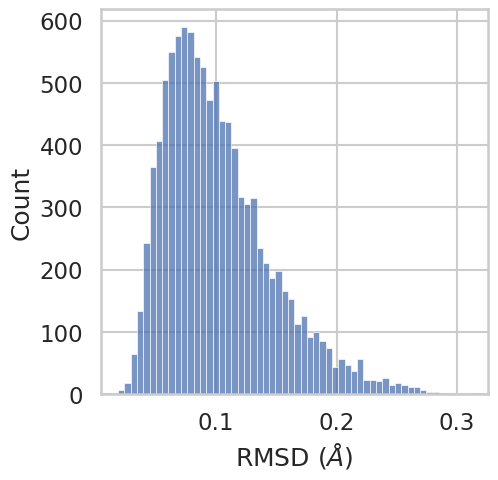

In [16]:
ax = sns.histplot(rms_list)
ax.set_xlabel("RMSD ($\AA$)");

In [17]:
PandasTools.WriteSDF(df_freq,"most_frequent.sdf")

In [18]:
df_2 = df_1.drop_duplicates(subset="inchi").copy()

In [19]:
ring_system_lookup = uru.RingSystemLookup()

In [20]:
df_2['ring_systems'] = [list(ring_system_lookup.process_mol(x)) for x in df_2.ROMol]

In [21]:
df_2[['min_ring','min_freq']] = [list(uru.get_min_ring_frequency(x)) for x in df_2.ring_systems]

In [22]:
odd_ring_df = df_2.query("min_freq < 100").drop_duplicates(subset="min_ring").sort_values("min_freq")
mols2grid.display(odd_ring_df, smiles_col="min_ring", subset=["img"],
                  custom_css=""".data-mols2grid-id-display { display: none }""",
                 selection=False)

MolGridWidget()

In [23]:
df_3 = df_2.query("min_freq >= 100").copy()

In [24]:
len(df_0),len(df_1),len(df_2),len(df_3)

(958, 916, 511, 395)

In [25]:
reos = uru.REOS()

In [26]:
for rule_set in reos.get_available_rule_sets():
    reos.set_active_rule_sets([rule_set])
    if rule_set == "PW":
        reos.drop_rule("furans")
    reos_res = [reos.process_mol(x) for x in df_3.ROMol]
    reos_ok = [x for x in reos_res if x[0] == "ok"]
    print(rule_set, len(reos_ok))

Glaxo 356
Dundee 145
BMS 208
PAINS 387
SureChEMBL 310
MLSMR 225
Inpharmatica 316
LINT 302


In [27]:
reos.set_active_rule_sets(["Dundee"])
df_3[['rule_set','reos']] = [list(reos.process_mol(x)) for x in df_3.ROMol]
uru.value_counts_df(df_3,"reos")

,reos,count
0,ok,145
1,het-C-het not in ring,130
2,imine,42
3,Aliphatic long chain,19
4,acyclic C=C-O,17
5,isolated alkene,5
6,alkyl halide,5
7,Oxygen-nitrogen single bond,5
8,2-halo pyridine,4
9,aldehyde,3


In [28]:
mol_list = df_3.query("reos == 'het-C-het not in ring'").head(6).copy().ROMol.values
[AllChem.Compute2DCoords(x) for x in mol_list]

[0, 0, 0, 0, 0, 0]

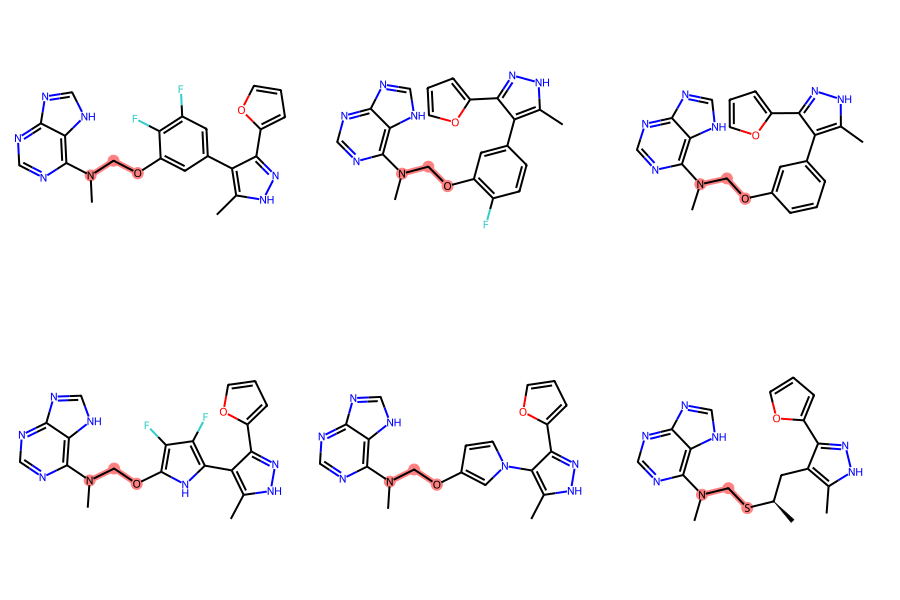

In [29]:
query_smarts = reos.active_rule_df.query("description == 'het-C-het not in ring'").smarts.values[0]
query_mol = Chem.MolFromSmarts(query_smarts)
match_atoms = [x.GetSubstructMatch(query_mol) for x in mol_list]
MolsToGridImage(mol_list,highlightAtomLists=match_atoms,subImgSize=(300, 300))

In [30]:
query_smarts

'[NX3R0,NX4R0,OR0,SX2R0][CX4][NX3R0,NX4R0,OR0,SX2R0]'

In [31]:
df_3.head()

,ID,ROMol,num_frags,inchi,ring_systems,min_ring,min_freq,rule_set,reos
1,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa54a3b0>,1,PWPNEEVREPUHGP-UHFFFAOYSA-O,"[(C1=CCCC1, 2065), (c1ncc2[nH]cnc2n1, 26701), ...",C1=CCCC1,2065,Dundee,imine
2,,<rdkit.Chem.rdchem.Mol object at 0x7d32fae62ea0>,1,BHHANBJKFBNEQA-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,Dundee,het-C-het not in ring
3,,<rdkit.Chem.rdchem.Mol object at 0x7d32fae637d0>,1,XKEGUXNFCXUBDB-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok
4,,<rdkit.Chem.rdchem.Mol object at 0x7d32fae63450>,1,VOOCRPWTUSTUSF-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok
5,,<rdkit.Chem.rdchem.Mol object at 0x7d32fae63370>,1,XBWWHXRTLPSFET-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,Dundee,het-C-het not in ring


In [32]:
df_4 = df_3.query("reos == 'ok'").copy()
mols2grid.display(df_4,mol_col="ROMol",size=(200,200))

MolGridWidget()

In [35]:
%%time
pb = PoseBusters(config="dock")
bust_df = pb.bust(df_4.ROMol,None,"sample_data/3hz1.pdb")

CPU times: user 18min 2s, sys: 1.47 s, total: 18min 4s
Wall time: 10min 45s


In [36]:
bust_df.head()

,,mol_pred_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,non-aromatic_ring_non-flatness,...,internal_energy,protein-ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters
file,molecule,,,,,,,,,,,,,,,,,,,,,
<rdkit.Chem.rdchem.Mol object at 0x7d32fae637d0>,mol_at_pos_0,True,True,True,True,True,True,True,False,True,True,...,True,True,False,False,False,False,False,False,False,False
<rdkit.Chem.rdchem.Mol object at 0x7d32fae63450>,mol_at_pos_0,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
<rdkit.Chem.rdchem.Mol object at 0x7d32fae63220>,mol_at_pos_0,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a53f0>,mol_at_pos_0,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a5850>,mol_at_pos_0,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False


In [37]:
bust_df.columns

Index(['mol_pred_loaded', 'mol_cond_loaded', 'sanitization',
       'inchi_convertible', 'all_atoms_connected', 'bond_lengths',
       'bond_angles', 'internal_steric_clash', 'aromatic_ring_flatness',
       'non-aromatic_ring_non-flatness', 'double_bond_flatness',
       'internal_energy', 'protein-ligand_maximum_distance',
       'minimum_distance_to_protein', 'minimum_distance_to_organic_cofactors',
       'minimum_distance_to_inorganic_cofactors', 'minimum_distance_to_waters',
       'volume_overlap_with_protein', 'volume_overlap_with_organic_cofactors',
       'volume_overlap_with_inorganic_cofactors',
       'volume_overlap_with_waters'],
      dtype='object')

In [38]:
cols = bust_df.columns
df_5 = pd.concat([df_4.reset_index(),bust_df.reset_index()[cols]],axis=1)

In [39]:
df_5['bust_sum'] = df_5[cols].sum(axis=1)

In [40]:
df_5.bust_sum.value_counts()

,count
bust_sum,
13,91
12,45
11,9


In [41]:
m = df_5.query("bust_sum == 11").ROMol.values[0]
Chem.MolToMolFile(m,"buster.sdf")

In [42]:
df_5.query("bust_sum == 11").head()

,index,ID,ROMol,num_frags,inchi,ring_systems,min_ring,min_freq,rule_set,reos,...,protein-ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,bust_sum
5,24,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3a59a0>,1,JXZAMVDPMXXXOX-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok,...,True,False,False,False,False,False,False,False,False,11
50,254,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3dff40>,1,RXRXEZWZBGOFRF-CQSZACIVSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok,...,True,False,False,False,False,False,False,False,False,11
54,278,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3e0900>,1,YNZUEMPDVWLWKG-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok,...,True,False,False,False,False,False,False,False,False,11
67,424,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa3f0660>,1,NBXSCPQEKCYWSX-UHFFFAOYSA-N,"[(c1ncc2[nH]cnc2n1, 26701), (c1ccoc1, 72468), ...",c1ncc2[nH]cnc2n1,26701,ok,ok,...,True,False,False,False,False,False,False,False,False,11
85,566,,<rdkit.Chem.rdchem.Mol object at 0x7d32fa2005f0>,1,QOPKLWKGAKVXSS-UHFFFAOYSA-N,"[(c1cocn1, 18781), (c1ncc2[nH]cnc2n1, 26701), ...",c1cocn1,18781,ok,ok,...,True,False,False,False,False,False,False,False,False,11


In [43]:
df_6 = df_5.query("bust_sum == 11").copy()

In [45]:
mols2grid.display(df_6.sort_values("min_freq"),mol_col="ROMol",size=(200,200),subset=["img","min_freq"], selection=False)

MolGridWidget()

In [46]:
df_6.columns

Index(['index', 'ID', 'ROMol', 'num_frags', 'inchi', 'ring_systems',
       'min_ring', 'min_freq', 'rule_set', 'reos', 'mol_pred_loaded',
       'mol_cond_loaded', 'sanitization', 'inchi_convertible',
       'all_atoms_connected', 'bond_lengths', 'bond_angles',
       'internal_steric_clash', 'aromatic_ring_flatness',
       'non-aromatic_ring_non-flatness', 'double_bond_flatness',
       'internal_energy', 'protein-ligand_maximum_distance',
       'minimum_distance_to_protein', 'minimum_distance_to_organic_cofactors',
       'minimum_distance_to_inorganic_cofactors', 'minimum_distance_to_waters',
       'volume_overlap_with_protein', 'volume_overlap_with_organic_cofactors',
       'volume_overlap_with_inorganic_cofactors', 'volume_overlap_with_waters',
       'bust_sum'],
      dtype='object')

In [47]:
def gen_conformers(mol, num_confs=10):
    """Generate conformers for a molecule

    :param mol: RDKit molecule
    :return: molecule with conformers
    """
    try:
        mol = Chem.AddHs(mol)
        params = AllChem.ETKDGv3()
        params.useSmallRingTorsions = True
        AllChem.EmbedMultipleConfs(mol, numConfs=num_confs, params=params)
        AllChem.MMFFOptimizeMoleculeConfs(mol)
        mol = Chem.RemoveHs(mol)
    except ValueError:
        mol = None
    return mol

def compare_pose_with_conformers(ref_mol):
    conf_mol = Chem.MolFromSmiles(Chem.MolToSmiles(ref_mol))
    conf_mol = gen_conformers(conf_mol, num_confs=50)
    rmsd_list = []
    for i in range(0,conf_mol.GetNumConformers()):
        rmsd_list.append([rdMolAlign.GetBestRMS(conf_mol, ref_mol, refId=0, prbId=i),i])
    rmsd_list.sort(key=itemgetter(0))
    best_rmsd, best_pose_id = rmsd_list[0]
    best_pose_mol = Chem.Mol(conf_mol, confId=best_pose_id)
    return best_rmsd, best_pose_mol

In [48]:
df_6['near_conf'] = df_6.ROMol.progress_apply(compare_pose_with_conformers)

  0%|          | 0/9 [00:00<?, ?it/s]

In [49]:
df_6['min_rmsd'] = [x[0] for x in df_6.near_conf]

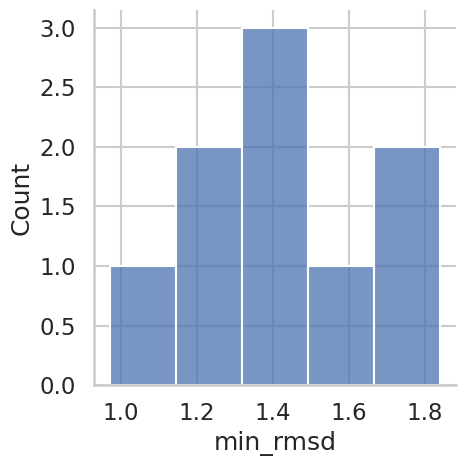

In [50]:
sns.displot(df_6.min_rmsd)

In [53]:
len(df_6.ROMol.values)

9

In [55]:
mol_34 = df_6.sort_values("min_freq").ROMol.values[8]
mol_34_rmsd, mol_34_min = compare_pose_with_conformers(mol_34)
Chem.MolToMolFile(mol_34_min,"mol_34_min.sdf")
Chem.MolToMolFile(df_6.sort_values("min_freq").ROMol.values[8],"mol_34.sdf")

In [57]:
Chem.MolToMolFile(df_6.sort_values("min_freq").ROMol.values[5],"mol_5.sdf")
mol_5 = df_6.sort_values("min_freq").ROMol.values[5]
mol_5_rmsd, mol_5_min = compare_pose_with_conformers(mol_5)
Chem.MolToMolFile(mol_5_min,"mol_5_min.sdf")

In [ ]:
%pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
smi_df = pd.read_csv("/content/allosteric_competitive_smi.tsv", sep="\t")

In [ ]:
smi_df.head()

In [ ]:
pip install rdkit

In [ ]:
smi_df.SMILES.to_csv("smi.smiles", index=False)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from IPython.display import display
import math

In [ ]:
smiles_file = 'smiles.smi'

In [ ]:
def chunks(lst, n):
 for i in range(0, len(lst), n):
  yield lst[i:i + n]

In [ ]:
with open(smiles_file, 'r') as file:
    smiles_list = [line.strip() for line in file]

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]

# Generate 2D coordinates for each molecule (important for drawing)
for mol in molecules:
 if mol:
        rdDepictor.Compute2DCoords(mol)

In [ ]:
len(molecules)

In [ ]:
legends = [f'{i+1}' for i in range(len(molecules))]

# Split the molecules into chunks
molecule_chunks = list(chunks(molecules, 50))  # Adjust the chunk size as needed
legend_chunks = list(chunks(legends, 50))

# Draw and display images for each chunk
for i, (chunk, legend_chunk) in enumerate(zip(molecule_chunks, legend_chunks)):
    img = Draw.MolsToImage(chunk, subImgSize=(200, 200), legends=legend_chunk, molsPerRow=4)
    display(img)